In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#roc curve and auc curve
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
X,y = make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [10]:
#Apply random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.982688888888889


In [11]:
#logestic regresssion
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
ytrain_pred = log_model.predict_proba(X_train)
print('logestic regression train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = log_model.predict_proba(X_test)
print('logestic regression test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

logestic regression train roc-auc: 0.9863568922694498
logestic regression test roc-auc: 0.9885777777777777


In [14]:
#adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train,y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('adaboost  train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('adaboost  test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

adaboost  train roc-auc: 0.9975081174960356
adaboost  test roc-auc: 0.9826111111111111


In [16]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
ytrain_pred = KNN.predict_proba(X_train)
print('KNN  train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = KNN.predict_proba(X_test)
print('KNN  test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,1])))

KNN  train roc-auc: 0.981670071491109
KNN  test roc-auc: 0.9426111111111111


In [18]:
# now will focues on selecting the best threshold for maximum accracy
pred = []
for model in [rf_model,log_model,ada_classifier,KNN]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print("Esemble test roc-auc: {}".format(roc_auc_score(y_test,final_prediction)))

Esemble test roc-auc: 0.9850444444444445


In [19]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.98,0.991861,0.559186,1.0
1,0.01,0.000008,0.463282,0.0
2,0.99,0.966929,0.538202,0.8
3,0.95,0.761539,0.509875,0.8
4,0.59,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.04,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [20]:
pred

[0      0.98
 1      0.01
 2      0.99
 3      0.95
 4      0.59
        ... 
 595    0.01
 596    0.04
 597    0.99
 598    0.01
 599    1.00
 Length: 600, dtype: float64,
 0      0.991861
 1      0.000008
 2      0.966929
 3      0.761539
 4      0.779443
          ...   
 595    0.024239
 596    0.000003
 597    0.984385
 598    0.001147
 599    0.989540
 Length: 600, dtype: float64,
 0      0.559186
 1      0.463282
 2      0.538202
 3      0.509875
 4      0.490344
          ...   
 595    0.461121
 596    0.441377
 597    0.532403
 598    0.441720
 599    0.559890
 Length: 600, dtype: float64,
 0      1.0
 1      0.0
 2      0.8
 3      0.8
 4      0.4
       ... 
 595    0.0
 596    0.0
 597    1.0
 598    0.2
 599    0.8
 Length: 600, dtype: float64]

In [21]:
final_prediction

0      0.882762
1      0.118323
2      0.823783
3      0.755353
4      0.564947
         ...   
595    0.123840
596    0.120345
597    0.876697
598    0.163217
599    0.837357
Length: 600, dtype: float64

In [24]:
# calculate the roc curve
fpr,tpr,threshold = roc_curve(y_test,final_prediction)
threshold

array([1.90938114, 0.90938114, 0.90674686, 0.90577475, 0.8068603 ,
       0.80662833, 0.80199934, 0.8005558 , 0.76632008, 0.76571156,
       0.76045305, 0.76037124, 0.74745214, 0.74387362, 0.6842442 ,
       0.68143711, 0.67506113, 0.67493537, 0.61366701, 0.59925354,
       0.59156376, 0.58864346, 0.5821569 , 0.57986186, 0.56042732,
       0.55639283, 0.54105932, 0.53127948, 0.48919266, 0.47116892,
       0.45990225, 0.44972765, 0.4321034 , 0.39318654, 0.39129719,
       0.34683098, 0.34086612, 0.23969741, 0.23896893, 0.2296341 ,
       0.22890421, 0.21233682, 0.21098417, 0.12303857, 0.1228351 ,
       0.10498954])

In [27]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in threshold:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(threshold), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['threshold', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,threshold,accuracy
32,0.432103,0.960000
31,0.449728,0.960000
29,0.471169,0.960000
30,0.459902,0.958333
28,0.489193,0.958333


In [28]:
accuracy_ls

,threshold,accuracy
32,0.432103,0.960000
31,0.449728,0.960000
29,0.471169,0.960000
30,0.459902,0.958333
28,0.489193,0.958333
27,0.531279,0.958333
26,0.541059,0.958333
25,0.556393,0.956667
24,0.560427,0.955000
23,0.579862,0.953333


In [29]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


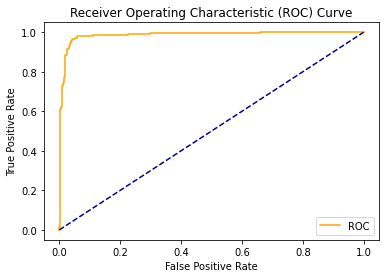

In [30]:
plot_roc_curve(fpr,tpr)